<a href="https://colab.research.google.com/github/DmitryKutsev/NIS_SentiFrame/blob/master/21_04_dataframe_and_fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://rusvectores.org/static/models/rusvectores4/fasttext/araneum_none_fasttextcbow_300_5_2018.tgz

!wget http://vectors.nlpl.eu/repository/20/187.zip

--2020-04-21 12:37:30--  http://vectors.nlpl.eu/repository/20/187.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2692389554 (2.5G) [application/zip]
Saving to: ‘187.zip’

187.zip             100%[===================>]   2.51G  17.2MB/s    in 2m 36s  

2020-04-21 12:40:07 (16.4 MB/s) - ‘187.zip’ saved [2692389554/2692389554]



In [2]:
!ls

187.zip  sample_data


In [0]:
!wget https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json

--2020-04-21 06:18:56--  https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606414 (592K) [text/plain]
Saving to: ‘collection.json’

collection.json     100%[===================>] 592.20K  --.-KB/s    in 0.09s   

2020-04-21 06:18:56 (6.28 MB/s) - ‘collection.json’ saved [606414/606414]



In [7]:
!pip install pymorphy2[fast]

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 7.1MB 13.3MB/s 
     |████████████████████████████████| 378kB 50.3MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=859387 sha256=cda6d7e046bb0001359cad8aed836b44dff693b638185571e4a000be8904347c
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [0]:
# !gunzip araneum_none_fasttextcbow_300_5_2018.tgz
# !tar -xvf araneum_none_fasttextcbow_300_5_2018.tar

gzip: araneum_none_fasttextcbow_300_5_2018.tgz: No such file or directory
araneum_none_fasttextcbow_300_5_2018.model
araneum_none_fasttextcbow_300_5_2018.model.vectors_ngrams.npy
araneum_none_fasttextcbow_300_5_2018.model.vectors.npy
araneum_none_fasttextcbow_300_5_2018.model.vectors_vocab.npy


In [11]:
!unzip 187.zip

Archive:  187.zip
  inflating: meta.json               
  inflating: model.model             
  inflating: model.model.vectors_ngrams.npy  
  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [12]:
!ls

187.zip      model.model.vectors_ngrams.npy  README
meta.json    model.model.vectors.npy	     sample_data
model.model  model.model.vectors_vocab.npy


In [0]:
from collections import Counter
import json
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import pymorphy2
import gensim
morph = pymorphy2.MorphAnalyzer()

In [13]:
#fasttext_model = gensim.models.KeyedVectors.load("araneum_none_fasttextcbow_300_5_2018.model", mmap='r')
fasttext_model = gensim.models.KeyedVectors.load("model.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
positive_multi_seed = ['одобрять', 'хвалить', 'поощрять', 'любить']
negative_multi_seed = ['ненавидеть', 'убить', 'ругать', 'злиться']
positive_single_seed = ['ценить']
negative_single_seed = ['убивать']
def make_seed_embedding(seed_dict, model):
  '''
  Принимает на вход список, на выходе дает средний вектор всех слов из этого списка
  '''
  summ = 0
  # if model == skipgram_model:
  #   for verb in seed_dict:
  #     summ = summ + model[verb + '_V']
  #   vector = summ/len(seed_dict)
  # else:
  for verb in seed_dict:
    summ = summ + model.get_vector(verb)
  vector = summ/len(seed_dict)

  return vector

positive_multi_embedding = make_seed_embedding(positive_multi_seed, fasttext_model)
negative_multi_embedding = make_seed_embedding(negative_multi_seed, fasttext_model)
positive_single_embedding = make_seed_embedding(positive_single_seed, fasttext_model)
negative_single_embedding = make_seed_embedding(negative_single_seed, fasttext_model)

In [0]:
dima = pd.read_csv('https://raw.githubusercontent.com\
/DmitryKutsev/NIS_SentiFrame/master/annotations/polarity_annotation/polar_annotation_dima.csv')

ira = pd.read_csv('https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/\
annotations/polarity_annotation/polar_annotation_ira.csv')


masha = pd.read_csv('https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/\
polarity_annotation/polar_annotation_masha.csv')

In [16]:
masha['1.1']

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
565    0.0
566    0.0
567    0.0
568    0.0
569    0.0
Name: 1.1, Length: 570, dtype: float64

In [17]:
dima.head()

,агитировать,1,1.1
0,адаптироваться,1,0
1,арестовать,6,0
2,арестовывать,6,0
3,атаковать,6,0
4,бастовать,6,0


In [18]:
ira.head()

,агитировать,1,0
0,адаптироваться,1,1
1,арестовать,6,0
2,арестовывать,6,0
3,атаковать,6,0
4,бастовать,6,1


In [19]:
dima['агитировать']

0       адаптироваться
1           арестовать
2         арестовывать
3            атаковать
4            бастовать
            ...       
565      шантажировать
566         шокировать
567         штурмовать
568    эксплуатировать
569     экстрадировать
Name: агитировать, Length: 570, dtype: object

In [20]:
int(str(masha['1.1'][1])[0])

0

In [0]:
all_dict = Counter()
for i in range(len(dima['1.1'])):
  if int(dima['1.1'][i]) > 0:
    all_dict[dima['агитировать'][i]] = [1,]

for i in range(len(masha['1.1'])):
  try:
    if int(str(masha['1.1'][i])[0]) > 0:
      if all_dict[masha['агитировать'][i]]:
        all_dict[masha['агитировать'][i]][0] += 1
      else:
        all_dict[masha['агитировать'][i]] = [1,]
  except Exception as e:
    pass
    # print(e)

for i in range(len(ira['1'])):
  if int(ira['1'][i]) > 0:
    if all_dict[ira['агитировать'][i]]:
      all_dict[ira['агитировать'][i]][0] += 1
    else:
      all_dict[ira['агитировать'][i]] = [1,]
#all_dict

In [0]:
#fasttext_model.get_vector('выслать')

In [0]:
for verb in all_dict.keys():
  #print(verb)
  try:
    pos_multi_distnce = cosine_distances(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(positive_multi_embedding))
    neg_multi_distnce = cosine_distances(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(negative_multi_embedding))
    if 1 - pos_multi_distnce > 1 - neg_multi_distnce:
      all_dict[verb].append(1)
    else:
      all_dict[verb].append(0)

  except (KeyError, AttributeError) as e:
    all_dict[verb].append(3)
  

In [44]:
full_df = pd.DataFrame(columns=('verb', 'manual_pos/neg', 'fasttext_pos/neg'))
#pos - 1, neg - 0, 3 - not in model
hit_dict = Counter(['pos_hit', 'neg_hit', 'pos_diff', 'neg_diff'])
none_hit_dict = Counter()
for i in all_dict.keys():
  if all_dict[i][0] >= 2:
    if  all_dict[i][1] == 1:
      hit_dict['pos_hit'] += 1
    else:
      hit_dict['pos_diff'] += 1
    full_df = full_df.append({'verb': i, 'manual_pos/neg': 1, 'fasttext_pos/neg': all_dict[i][1]}, ignore_index=True)

  else:
    full_df = full_df.append({'verb': i, 'manual_pos/neg': 0, 'fasttext_pos/neg': all_dict[i][1]}, ignore_index=True)
    if  all_dict[i][1] == 1:
      hit_dict['neg_hit'] += 1
    else:
      hit_dict['neg_diff'] += 1

hit_dict


Counter({'neg_diff': 268, 'neg_hit': 91, 'pos_diff': 64, 'pos_hit': 150})

In [45]:
full_df.head(200)

,verb,manual_pos/neg,fasttext_pos/neg
0,беречь,1,1
1,беспокоиться,1,0
2,благодарить,1,1
3,благословить,1,1
4,вдохновить,1,1
...,...,...,...
195,предотвратить,1,1
196,предотвращать,1,1
197,предпочесть,1,1
198,предпочитать,1,1


In [0]:
import matplotlib.pyplot as plt

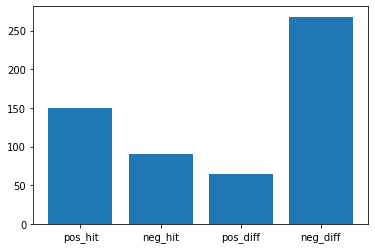

In [47]:
plt.bar(*zip(*hit_dict.items()))
plt.show()